# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-
To: /content/Bus_Breakdown_and_Delays.csv
100% 34.4M/34.4M [00:00<00:00, 184MB/s]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [114]:
bus_df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')

## Importing Libraries

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from keras import models
from keras import layers
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical


## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [6]:
# Getting a basic understanding of the dataframe structure
bus_df.head()

School_Year  Busbreakdown_ID  Run_Type Bus_No Route_Number         Reason  \
0   2015-2016          1224901  Pre-K/EI    811            1          Other   
1   2015-2016          1225098  Pre-K/EI   9302            1  Heavy Traffic   
2   2015-2016          1215800  Pre-K/EI    358            2  Heavy Traffic   
3   2015-2016          1215511  Pre-K/EI    331            2          Other   
4   2015-2016          1215828  Pre-K/EI    332            2          Other   

  Schools_Serviced             Occurred_On              Created_On   Boro  \
0             C353  10/26/2015 08:30:00 AM  10/26/2015 08:40:00 AM  Bronx   
1             C814  10/27/2015 07:10:00 AM  10/27/2015 07:11:00 AM  Bronx   
2             C195  09/18/2015 07:36:00 AM  09/18/2015 07:38:00 AM  Bronx   
3             C178  09/17/2015 08:08:00 AM  09/17/2015 08:12:00 AM  Bronx   
4             S176  09/18/2015 07:39:00 AM  09/18/2015 07:45:00 AM  Bronx   

   ... How_Long_Delayed Number_Of_Students_On_The_Bus  \
0  ...        10MINUTES                             5   
1  ...       25 MINUTES                             3   
2  ...       15 MINUTES                            12   
3  ...       10 minutes                            11   
4  ...        10MINUTES                            12   

   Has_Contractor_Notified_Schools Has_Contractor_Notified_Parents  \
0                              Yes                             Yes   
1                              Yes                             Yes   
2                              Yes                             Yes   
3                              Yes                             Yes   
4                              Yes                             Yes   

  Have_You_Alerted_OPT             Informed_On Incident_Number  \
0                   No  10/26/2015 08:40:00 AM             NaN   
1                   No  10/27/2015 07:11:00 AM             NaN   
2                  Yes  09/18/2015 07:38:00 AM             NaN   
3                  Yes  09/17/2015 08:12:00 AM             NaN   
4                   No  09/18/2015 07:45:00 AM             NaN   

          Last_Updated_On Breakdown_or_Running_Late School_Age_or_PreK  
0  10/26/2015 08:40:39 AM              Running Late              Pre-K  
1  10/27/2015 07:11:22 AM              Running Late              Pre-K  
2  09/18/2015 07:38:44 AM              Running Late              Pre-K  
3  09/17/2015 08:12:08 AM              Running Late              Pre-K  
4  09/18/2015 07:56:40 AM              Running Late              Pre-K  

[5 rows x 21 columns]

In [7]:
# Looking at the values and data types for each feature
bus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [8]:
# Checking the summary statistics of the dataframe
bus_df.describe()

Busbreakdown_ID  Number_Of_Students_On_The_Bus
count     1.479720e+05                  147972.000000
mean      1.287779e+06                       3.590071
std       4.324338e+04                      55.365859
min       1.212681e+06                       0.000000
25%       1.250438e+06                       0.000000
50%       1.287844e+06                       0.000000
75%       1.325191e+06                       4.000000
max       1.362605e+06                    9007.000000

In [9]:
# Checking for null values and duplicates
bus_df.isnull().sum()

School_Year                             0
Busbreakdown_ID                         0
Run_Type                               89
Bus_No                                  0
Route_Number                           88
Reason                                102
Schools_Serviced                        0
Occurred_On                             0
Created_On                              0
Boro                                 6318
Bus_Company_Name                        0
How_Long_Delayed                    21630
Number_Of_Students_On_The_Bus           0
Has_Contractor_Notified_Schools         0
Has_Contractor_Notified_Parents         0
Have_You_Alerted_OPT                    0
Informed_On                             0
Incident_Number                    142340
Last_Updated_On                         0
Breakdown_or_Running_Late               0
School_Age_or_PreK                      0
dtype: int64

In [10]:
bus_df.duplicated().sum()

0

In [12]:
# We will check the target columns count to identify whether the data is balanced or not
# This is figure 1
px.histogram(bus_df, x='Breakdown_or_Running_Late')

Figure 1: I can see that the data is not balanced and is in need of new data synthesis after more preprocessing.

In [13]:
# I will be getting the correlation matrix for the current numerical values
num_features = bus_df[['Number_Of_Students_On_The_Bus', 'Busbreakdown_ID']]
num_features.corr()

Number_Of_Students_On_The_Bus  Busbreakdown_ID
Number_Of_Students_On_The_Bus                       1.000000        -0.016243
Busbreakdown_ID                                    -0.016243         1.000000

<Axes: >

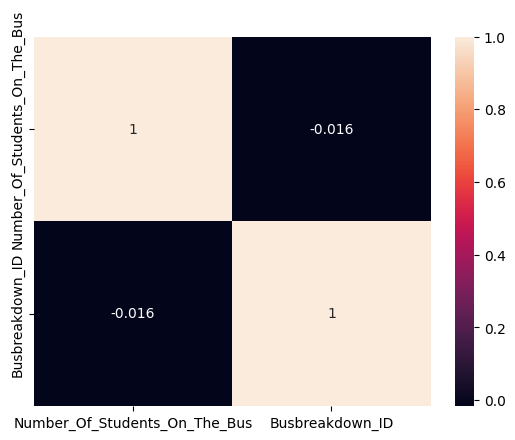

In [14]:
# Figure 2
sns.heatmap(num_features.corr(), annot=True)

Figure 2: This is a heatmap for the 2 numerical values in the dataset and it can be seen that there is no correlation between the id and the number of students on the bus which is to be expected.

<Axes: ylabel='Number_Of_Students_On_The_Bus'>

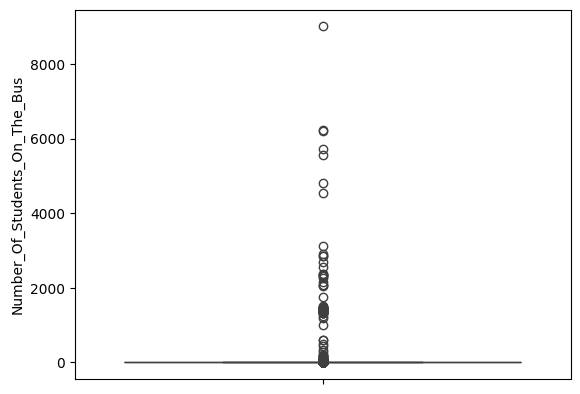

In [18]:
# Checking for outliers
# This is figure 3
sns.boxplot(bus_df, y='Number_Of_Students_On_The_Bus')

Figure 3: This figure represents the quartile ranges for the box plot and the data seems to have many outlier data points

In [22]:
# Basic feature exploration to look at the distribution of values
# This is figure 4
px.histogram(bus_df, x='Reason')

Figure 4: This figure outlines the reason these buses are either late or broken down, alongside that it also displays the count for each reason

In [23]:
# More feature exploration
# This is figure 5
px.histogram(bus_df, x='How_Long_Delayed')

Figure 5: This figure is showing the inconsistent values of the 'How_Long_Delayed' column which needs attention within the preprocessing step

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [115]:
# Handelling missing values and removing the unnecessary features
bus_df.drop(['Incident_Number', 'How_Long_Delayed', 'Busbreakdown_ID', 'Bus_No', 'Route_Number', 'Schools_Serviced', 'Occurred_On', 'Created_On', 'Informed_On', 'Last_Updated_On'], axis=1, inplace=True)

In [116]:
# The rest of the null values can be dropped because they are a small amount
bus_df.dropna(inplace=True)

In [117]:
# Making sure that the null values have been dropped
bus_df.isnull().sum()

School_Year                        0
Run_Type                           0
Reason                             0
Boro                               0
Bus_Company_Name                   0
Number_Of_Students_On_The_Bus      0
Has_Contractor_Notified_Schools    0
Has_Contractor_Notified_Parents    0
Have_You_Alerted_OPT               0
Breakdown_or_Running_Late          0
School_Age_or_PreK                 0
dtype: int64

In [118]:
# Checking how many values are remaining
bus_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141466 entries, 0 to 147971
Data columns (total 11 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      141466 non-null  object
 1   Run_Type                         141466 non-null  object
 2   Reason                           141466 non-null  object
 3   Boro                             141466 non-null  object
 4   Bus_Company_Name                 141466 non-null  object
 5   Number_Of_Students_On_The_Bus    141466 non-null  int64 
 6   Has_Contractor_Notified_Schools  141466 non-null  object
 7   Has_Contractor_Notified_Parents  141466 non-null  object
 8   Have_You_Alerted_OPT             141466 non-null  object
 9   Breakdown_or_Running_Late        141466 non-null  object
 10  School_Age_or_PreK               141466 non-null  object
dtypes: int64(1), object(10)
memory usage: 13.0+ MB


In [119]:
# Dealing with outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)][column]

bus_df['Number_Of_Students_On_The_Bus'] = remove_outliers(bus_df, 'Number_Of_Students_On_The_Bus')

In [120]:
# Dropping the NA rows after removing the outliers from the function above
bus_df.dropna(inplace=True)

In [121]:
# Encoding the categorical labels
label_categories = ['School_Year', 'Run_Type', 'Reason', 'Boro', 'Bus_Company_Name', 'School_Age_or_PreK', 'Breakdown_or_Running_Late']
Onehot_categories = ['Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents', 'Have_You_Alerted_OPT']

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)

for category in label_categories:
    bus_df[category] = label_encoder.fit_transform(bus_df[category])

bus_df = pd.get_dummies(bus_df, columns=Onehot_categories)

In [122]:
# Verifying the change
bus_df

School_Year  Run_Type  Reason  Boro  Bus_Company_Name  \
0                 0         3       6     1                25   
1                 0         3       3     1                25   
6                 0         3       3     1                25   
7                 0         3       3     1                25   
8                 0         7       3     7                45   
...             ...       ...     ...   ...               ...   
147967            1         3       3     1                25   
147968            1         3       3     1                25   
147969            1         9       3     1                24   
147970            1         9       9     7                41   
147971            1         6       6     2                68   

        Number_Of_Students_On_The_Bus  Breakdown_or_Running_Late  \
0                                 5.0                          1   
1                                 3.0                          1   
6                                 3.0                          1   
7                                 4.0                          1   
8                                 0.0                          1   
...                               ...                        ...   
147967                            7.0                          1   
147968                            0.0                          1   
147969                            0.0                          1   
147970                            0.0                          0   
147971                            7.0                          1   

        School_Age_or_PreK  Has_Contractor_Notified_Schools_No  \
0                        0                               False   
1                        0                               False   
6                        0                               False   
7                        0                               False   
8                        1                               False   
...                    ...                                 ...   
147967                   0                               False   
147968                   0                               False   
147969                   1                               False   
147970                   1                               False   
147971                   1                               False   

        Has_Contractor_Notified_Schools_Yes  \
0                                      True   
1                                      True   
6                                      True   
7                                      True   
8                                      True   
...                                     ...   
147967                                 True   
147968                                 True   
147969                                 True   
147970                                 True   
147971                                 True   

        Has_Contractor_Notified_Parents_No  \
0                                    False   
1                                    False   
6                                    False   
7                                    False   
8                                    False   
...                                    ...   
147967                               False   
147968                               False   
147969                               False   
147970                               False   
147971                               False   

        Has_Contractor_Notified_Parents_Yes  Have_You_Alerted_OPT_No  \
0                                      True                     True   
1                                      True                     True   
6                                      True                    False   
7                                      True                     True   
8                                      True                     True   
...                                     ...                      ..

In [123]:
# Handelling the imbalanced dataset issue
x = bus_df.drop('Breakdown_or_Running_Late', axis=1)
y = bus_df['Breakdown_or_Running_Late']

oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [124]:
# Scaling the new numerical features
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [125]:
# Checking if the SMOTE technique worked
# This is figure 6
px.histogram(y)

Figure 6: After the smote technique the data is now balanced

In [126]:
# One hot encoding the Y (target)
y = to_categorical(y)

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [127]:
# Spliting the dataset into training validation and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [134]:
# Building the ANN model that consists of 3 hidden layers 16, 32, 64 Neurons
bus_model = models.Sequential([
    layers.Dense(13, activation='relu', kernel_initializer='uniform', input_shape=(13,)),
    layers.Dense(16, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(2, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [135]:
# Compiling the model using the adaptive momentum (adam) optimizer and displaying the number of parameters
bus_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
bus_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 13)                  │             182 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,512 (13.72 KB)

 Trainable params: 3,352 (13.09 KB)

 Non-trainable params: 160 (640.00 B)

## Training the Model
Train the ANN model using the training data.

In [136]:
# Training the model with 30 epochs and batch_size 32 against the validation data
bus_history = bus_model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/30
4414/4414 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8251 - loss: 0.4005 - val_accuracy: 0.9107 - val_loss: 0.2379
Epoch 2/30
4414/4414 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9043 - loss: 0.2482 - val_accuracy: 0.9190 - val_loss: 0.2138
Epoch 3/30
4414/4414 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9129 - loss: 0.2310 - val_accuracy: 0.9192 - val_loss: 0.2120
Epoch 4/30
4414/4414 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9129 - loss: 0.2260 - val_accuracy: 0.9235 - val_loss: 0.2077
Epoch 5/30
4414/4414 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9147 - loss: 0.2208 - val_accuracy: 0.9260 - val_loss: 0.1979
Epoch 6/30
4414/4414 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9166 - loss: 0.2166 - val_accuracy: 0.9243 - val_loss: 0.1969
Epoch 7/30
4414/4414 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9168 - loss: 0.2135 - val_accuracy: 0.9230 - val_loss: 0.1979
Epoch 8/30
4414/4414 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9177 - loss: 0

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [133]:
#.evaluate evaluates the models performence on the test data
bus_model.evaluate(x_test, y_test)

1472/1472 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9281 - loss: 0.1787


[0.17980198562145233, 0.928562343120575]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [140]:
# Predicts the data from the test set
y_pred = bus_model.predict(x_test)

1472/1472 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [143]:
print(y_pred)

[[4.1035870e-03 9.9586844e-01]
 [8.5982805e-01 1.3943884e-01]
 [2.0557723e-06 9.9999791e-01]
 ...
 [9.8846620e-01 1.1515064e-02]
 [9.6214604e-01 3.7520085e-02]
 [9.5462811e-01 4.4930521e-02]]


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

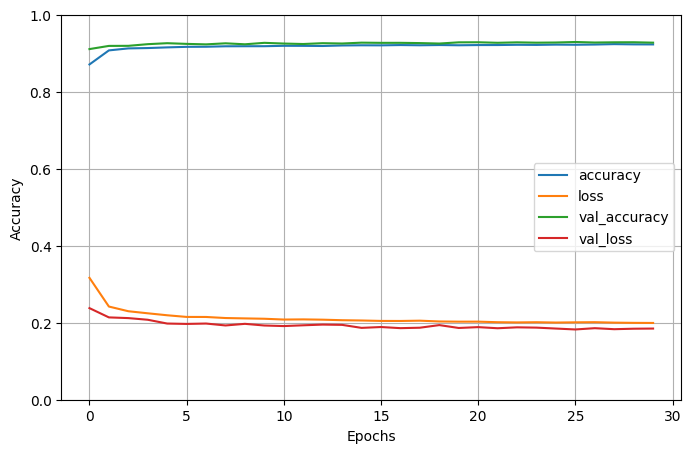

In [145]:
# Metric performance of the model during the training
# This is figure 7
pd.DataFrame(bus_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

Figure 7: I can see that the epoch values increase the accuracy decreases and there is no sign of overfitting

## Save the Model
Save the trained model for submission.

In [146]:
# Saves the model
models.save_model(bus_model, 'bus_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

Models performence: Training 92.3%, Validation 92.7%, Test 92.8%

Data Preprocessing:
The reason why I chose label and one hot encoding and scaling is because these 3 preprocessing tools are the best in helping normalise the data. these helped by transforming all the categorical features into numerical features.

Model Architecture:
I believe that this architecture is the most appropriate due to its scale being high but not too high for overfitting.

Activation Functions:
ReLU was the chose activation function mainly because of its unique feature to ignore negative values and sigmoid was used for the output layer since this is a binary classification problem.

Training process:
I chose 32 batch size as I do not want to use more memory from the colab environment which causes it to slow down in some cases, the epoch values were chosen because increasing them past 30 will yield no better results, finally, adam optimiser is used because it ran stable on the training.

Loss function and metrics:
Loss function was binary cross entropy since as stated before this is a binary classification task, and accuracy was used as a metric to simplify the performance evaluation.

Regularisation techniques:
I implemented these regularisation techniques to avoid overfitting and this can be seen from the val accuracy not being lower than the training accuracy.

Model Evaluation:
The reason why I chose accuracy was because it would be the easiest method to visualise quickly how well the model does, rather then having to seperate measurements.

Overfitting and underfitting:
There was no over/underfitting in the model.
